# Read Dataset

In [1]:
import pandas as pd
trainset=pd.read_csv("Desktop/Project 1 statements/training_set.csv")
testset=pd.read_csv("Desktop/Project 1 statements/testing_set.csv")

In [2]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Missing Data Treatment

In [4]:
trainset.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
testset.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [6]:
cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

# Replacing NA to none

In [7]:
for i in cols:
    trainset[i]=trainset[i].fillna("None")
    testset[i]=testset[i].fillna("None")

In [8]:
from PM8wd import replacer
replacer(trainset)
replacer(testset)

In [9]:
trainset.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [10]:
testset.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Outlier detection and removal based on Zscore values

In [11]:
from PM8wd import catconsep
cat,con = catconsep(trainset)

In [12]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trainset[con]),columns=con)

In [15]:
X1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,1.723747,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,1.726120,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,1.728492,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [16]:
outliers = []
for i in con:
    outliers.extend(list(X1[(X1[i]>3)|(X1[i]<-3)].index))

In [17]:
outliers.sort()

In [18]:
outliers

[1,
 3,
 5,
 7,
 8,
 9,
 9,
 17,
 24,
 26,
 28,
 33,
 37,
 37,
 39,
 41,
 46,
 48,
 48,
 50,
 51,
 52,
 53,
 53,
 53,
 53,
 55,
 58,
 58,
 64,
 70,
 70,
 72,
 74,
 78,
 80,
 88,
 88,
 93,
 93,
 93,
 93,
 102,
 104,
 105,
 113,
 115,
 116,
 116,
 118,
 120,
 125,
 125,
 129,
 129,
 137,
 137,
 144,
 144,
 153,
 154,
 159,
 161,
 165,
 165,
 166,
 166,
 166,
 169,
 169,
 170,
 171,
 176,
 176,
 178,
 178,
 178,
 178,
 182,
 185,
 185,
 185,
 185,
 185,
 185,
 185,
 187,
 188,
 188,
 188,
 189,
 189,
 191,
 196,
 197,
 197,
 197,
 197,
 197,
 197,
 198,
 201,
 205,
 213,
 215,
 218,
 218,
 224,
 224,
 224,
 224,
 231,
 233,
 237,
 241,
 245,
 246,
 246,
 249,
 249,
 250,
 251,
 253,
 253,
 258,
 260,
 260,
 263,
 263,
 267,
 271,
 273,
 277,
 278,
 280,
 289,
 291,
 291,
 293,
 297,
 297,
 298,
 298,
 299,
 300,
 304,
 304,
 304,
 304,
 306,
 309,
 312,
 312,
 313,
 313,
 313,
 313,
 314,
 314,
 322,
 325,
 326,
 328,
 330,
 330,
 330,
 332,
 335,
 335,
 335,
 335,
 339,
 342,
 343,
 346,

In [19]:
from numpy import unique
outliers = unique(outliers)

In [20]:
outliers

array([   1,    3,    5,    7,    8,    9,   17,   24,   26,   28,   33,
         37,   39,   41,   46,   48,   50,   51,   52,   53,   55,   58,
         64,   70,   72,   74,   78,   80,   88,   93,  102,  104,  105,
        113,  115,  116,  118,  120,  125,  129,  137,  144,  153,  154,
        159,  161,  165,  166,  169,  170,  171,  176,  178,  182,  185,
        187,  188,  189,  191,  196,  197,  198,  201,  205,  213,  215,
        218,  224,  231,  233,  237,  241,  245,  246,  249,  250,  251,
        253,  258,  260,  263,  267,  271,  273,  277,  278,  280,  289,
        291,  293,  297,  298,  299,  300,  304,  306,  309,  312,  313,
        314,  322,  325,  326,  328,  330,  332,  335,  339,  342,  343,
        346,  349,  351,  352,  355,  357,  358,  359,  360,  365,  366,
        367,  375,  378,  380,  384,  389,  398,  400,  403,  406,  411,
        414,  420,  421,  426,  440,  441,  446,  451,  454,  457,  459,
        461,  462,  470,  471,  473,  475,  477,  4

In [21]:
trainset = trainset.drop(index=outliers,axis=0)
trainset.index = range(0,trainset.shape[0])

In [22]:
trainset.shape

(1015, 81)

# Same steps for Testing set

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
con.remove("SalePrice")
X1 = pd.DataFrame(ss.fit_transform(testset[con]),columns=con)

outliers = []
for i in con:
    outliers.extend(list(X1[(X1[i]>3)|(X1[i]<-3)].index))
    
from numpy import unique
outliers = unique(outliers)

testset = testset.drop(index=outliers,axis=0)
testset.index = range(0,testset.shape[0])

# EDA

In [24]:
Y = trainset[["SalePrice"]]
X = trainset.drop(labels=["Id","SalePrice"],axis=1)

In [25]:
cat,con = catconsep(X)

In [26]:
Q = trainset.corr()[["SalePrice"]].sort_values(by="SalePrice")

In [27]:
Q

,SalePrice
EnclosedPorch,-0.205026
OverallCond,-0.158932
BsmtFinSF2,-0.098253
MiscVal,-0.070746
MSSubClass,-0.037097
YrSold,-0.026457
Id,-0.024314
LowQualFinSF,-0.020850
3SsnPorch,-0.001348
ScreenPorch,0.017633


In [28]:
Q1 = list(Q[Q.SalePrice>0.2].index)

In [29]:
Q1

['BsmtUnfSF',
 'BsmtFullBath',
 'HalfBath',
 'BedroomAbvGr',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'LotArea',
 'LotFrontage',
 'OpenPorchSF',
 'MasVnrArea',
 'Fireplaces',
 'GarageYrBlt',
 'YearRemodAdd',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'SalePrice']

In [30]:
#we dont need saleprice in Q1
imp_con_cols = Q1[0:len(Q1)-1]

In [31]:
#imp_con_cols+

In [32]:
#we need to use ANOVA here...bcz tr contains cat and con so(Y is con and X is cat and con)
#i-> cat
from PM8wd import ANOVA
imp_cat = []
for i in cat:
    q = ANOVA(trainset,i,"SalePrice")
    if(q<0.05):
        imp_cat.append(i)

In [33]:
#these are cplumns with pvlaue<0.05
imp_cat

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# Preprocessing

In [34]:
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(trainset[imp_con_cols]),columns=imp_con_cols)
X2 = pd.get_dummies(trainset[imp_cat])
Xnew = X1.join(X2)

In [35]:
Xnew.shape

(1015, 246)

In [36]:
Y.shape

(1015, 1)

# Data Splitting

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Model building

In [38]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
print(round(model.rsquared_adj,4),"\n\n")
col_to_drop = model.pvalues.sort_values().index[-1]

0.9295 




# Loop for dropping columns

In [39]:
#initial we had taken range till 200....#till 125 we need to keep columns...bcz rsq is dropping ...so ned to change range 200 to 125
rsq = []
dropped_columns = []
Q = range(1,125)
for i in Q:
    Xnew = Xnew.drop(labels=col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    rsq.append(round(model.rsquared_adj,4))
    dropped_columns.append(col_to_drop)
    col_to_drop = model.pvalues.sort_values().index[-1]
    

In [40]:
rsq

[0.9295,
 0.9295,
 0.9295,
 0.9295,
 0.9295,
 0.9296,
 0.9296,
 0.9297,
 0.9297,
 0.9297,
 0.9297,
 0.9299,
 0.9299,
 0.93,
 0.93,
 0.9301,
 0.9301,
 0.9301,
 0.9301,
 0.9301,
 0.9302,
 0.9302,
 0.9303,
 0.9304,
 0.9304,
 0.9305,
 0.9306,
 0.9307,
 0.9307,
 0.9307,
 0.9309,
 0.931,
 0.931,
 0.9311,
 0.9312,
 0.9313,
 0.9314,
 0.9314,
 0.9314,
 0.9315,
 0.9315,
 0.9316,
 0.9316,
 0.9317,
 0.9318,
 0.9319,
 0.9319,
 0.932,
 0.932,
 0.9321,
 0.9322,
 0.9322,
 0.9323,
 0.9324,
 0.9325,
 0.9325,
 0.9326,
 0.9326,
 0.9327,
 0.9327,
 0.9328,
 0.9329,
 0.933,
 0.9331,
 0.9331,
 0.9331,
 0.9332,
 0.9332,
 0.9333,
 0.9334,
 0.9334,
 0.9335,
 0.9336,
 0.9336,
 0.9337,
 0.9338,
 0.9338,
 0.9339,
 0.9339,
 0.934,
 0.9341,
 0.9341,
 0.9342,
 0.9343,
 0.9343,
 0.9343,
 0.9344,
 0.9344,
 0.9345,
 0.9346,
 0.9347,
 0.9347,
 0.9347,
 0.9348,
 0.9348,
 0.9348,
 0.9349,
 0.9349,
 0.935,
 0.935,
 0.935,
 0.9351,
 0.9351,
 0.9352,
 0.9352,
 0.9352,
 0.9352,
 0.9352,
 0.9353,
 0.9353,
 0.9353,
 0.9353,
 0.93

In [41]:
list(enumerate(dropped_columns))

[(0, 'SaleType_Con'),
 (1, 'Exterior1st_Stucco'),
 (2, 'Foundation_Wood'),
 (3, 'MasVnrType_BrkCmn'),
 (4, 'Exterior2nd_Stone'),
 (5, 'TotRmsAbvGrd'),
 (6, 'BsmtFinType1_Rec'),
 (7, 'Foundation_PConc'),
 (8, 'Neighborhood_Somerst'),
 (9, 'BldgType_TwnhsE'),
 (10, 'GarageCond_TA'),
 (11, 'GarageCond_Gd'),
 (12, 'Heating_GasW'),
 (13, 'Heating_GasA'),
 (14, 'Exterior2nd_Other'),
 (15, 'Exterior2nd_BrkFace'),
 (16, 'GarageType_Basment'),
 (17, 'RoofStyle_Mansard'),
 (18, 'Heating_Floor'),
 (19, 'Electrical_FuseP'),
 (20, 'Exterior2nd_Plywood'),
 (21, 'HouseStyle_1.5Fin'),
 (22, 'Exterior2nd_Brk Cmn'),
 (23, 'GrLivArea'),
 (24, 'Alley_Pave'),
 (25, 'RoofStyle_Flat'),
 (26, 'Exterior1st_MetalSd'),
 (27, 'Neighborhood_IDOTRR'),
 (28, 'SaleType_Oth'),
 (29, 'Condition1_RRNe'),
 (30, 'Condition1_Artery'),
 (31, 'Condition1_PosA'),
 (32, 'BsmtFinType2_Unf'),
 (33, 'HouseStyle_SLvl'),
 (34, 'Exterior2nd_ImStucc'),
 (35, 'Neighborhood_Blueste'),
 (36, 'BsmtFinSF1'),
 (37, 'SaleCondition_Abnorml')

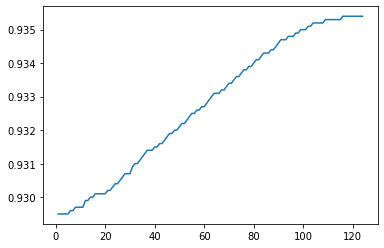

In [42]:
#till 125 we need to keep columns...bcz rsq is dropping 
import matplotlib.pyplot as plt
plt.plot(Q,rsq)

# Create a Linear model for selected columns

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)

In [44]:
tr_err

229152040.70320198

In [45]:
ts_err

5.976271912608707e+30

In [46]:
from numpy import sqrt
trnew = sqrt(tr_err)
tsnew = sqrt(ts_err)

In [47]:
trnew

15137.768683105247

In [48]:
tsnew

2444641469133808.5

# Regularize the model

In [49]:
lambdas = []
q = 0.00
for i in range(0,2000):
    q = round(q + 0.01,2)
    lambdas.append(q)

In [50]:
tr = []
ts = []
for i in lambdas:
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = mean_squared_error(ytrain,pred_tr)
    ts_err = mean_squared_error(ytest,pred_ts)
    tr.append(tr_err)
    ts.append(ts_err)

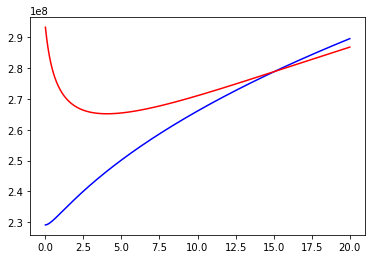

In [51]:
plt.plot(lambdas,tr,c="blue")
plt.plot(lambdas,ts,c="red")

In [52]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=15.1)
model = rr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
print("Training Error: ",tr_err)
print("Testing Error: ",ts_err)

Training Error:  279010309.4671003
Testing Error:  278967370.23936415


In [53]:
from numpy import sqrt
trnew1 = sqrt(tr_err)
tsnew1 = sqrt(ts_err)

In [54]:
trnew1

16703.60169146464

In [55]:
tsnew1

16702.316313594474

# Cross Validation

In [56]:
tuning_grid = {"alpha":lambdas}
rr = Ridge()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tuning_grid,scoring="neg_mean_squared_error",cv=10)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 1.82}

# Create a Model

In [57]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=1.82)
model = rr.fit(Xnew,Y)

# Final predictions on Testing Data

In [58]:
Xnew.shape

(1015, 122)

In [59]:
#here,we have to take Xnew(trainset) con columns...i.e X1.....bcz we need to apply transform
X1_test = pd.DataFrame(ss.transform(testset[X1.columns]),columns=X1.columns)

In [62]:
cat,con=catconsep(testset)

In [65]:
#pd.get_dummies(testset[cat])[X2.columns]...if we did like this ...
#we will get cat columns which are present in cat of train set and not present in testset

In [68]:
 X2_prov = pd.get_dummies(testset[cat])

In [69]:
for i in ['Exterior2nd_Other', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Heating_Grav', 'Exterior2nd_Stone', 'Heating_Floor', 'Heating_Wall', 'GarageQual_Ex']:
    X2_prov[i]=0

In [70]:
X2_prov

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleCondition_Normal,SaleCondition_Partial,Exterior2nd_Other,Exterior1st_CBlock,Exterior1st_ImStucc,Heating_Grav,Exterior2nd_Stone,Heating_Floor,Heating_Wall,GarageQual_Ex
0,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1015,0,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1016,0,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1017,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:

X2_prov[X2.columns]

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1015,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1016,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1017,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [73]:
X2_final = X2_prov[X2.columns]

In [74]:
final_X = X1_test.join(X2_final)
final_X = final_X[Xnew.columns]

In [75]:
Xnew.shape

(1015, 122)

In [76]:
final_X.shape

(1019, 122)

# Prediction based on Testing dataset

In [78]:
model.predict(final_X)
    

array([[117056.94770112],
       [191650.41737242],
       [198902.44386789],
       ...,
       [ 73461.7614477 ],
       [ 86065.1240799 ],
       [208715.37916683]])

In [ ]:
Q = []

for i in model.predict(final_X):
    Q.append(round(i[0],2))

In [79]:
Q

[117056.95,
 191650.42,
 198902.44,
 201253.2,
 171785.79,
 160069.96,
 202096.75,
 124666.97,
 183811.97,
 96802.81,
 92688.81,
 141474.0,
 103396.23,
 344194.67,
 250004.7,
 299353.28,
 297931.51,
 296885.41,
 208702.22,
 179439.04,
 167665.17,
 183131.45,
 194911.44,
 223555.91,
 201573.67,
 198879.83,
 85023.14,
 279115.84,
 243619.91,
 182780.54,
 170607.14,
 169544.88,
 156017.71,
 147030.82,
 245447.79,
 235943.6,
 191390.35,
 262732.04,
 152921.47,
 148096.15,
 148723.64,
 195805.53,
 158175.89,
 181925.02,
 229151.95,
 138941.95,
 144464.71,
 182795.93,
 115622.36,
 119603.25,
 142204.72,
 164026.5,
 86431.12,
 124576.04,
 152914.33,
 141016.01,
 163283.87,
 196723.54,
 69336.66,
 117352.76,
 125762.31,
 144100.37,
 124213.5,
 146740.48,
 118313.32,
 146714.68,
 167699.12,
 105791.08,
 130091.76,
 131682.86,
 160775.96,
 163718.99,
 82526.79,
 231859.56,
 135480.4,
 146115.26,
 259604.7,
 141345.11,
 186279.29,
 146238.88,
 149553.07,
 192604.38,
 122664.16,
 283293.87,
 22039

In [81]:
Q1 = pd.DataFrame([testset.Id]).T

In [82]:
Q1

,Id
0,1461
1,1463
2,1464
3,1465
4,1466
...,...
1014,2913
1015,2914
1016,2915
1017,2916


In [83]:
Q1['Predicted_SalePrice']=Q

In [84]:
Q1

,Id,Predicted_SalePrice
0,1461,117056.95
1,1463,191650.42
2,1464,198902.44
3,1465,201253.20
4,1466,171785.79
...,...,...
1014,2913,82530.77
1015,2914,74171.70
1016,2915,73461.76
1017,2916,86065.12


In [85]:
Q1.to_csv("submissions.csv")